<a href="https://colab.research.google.com/github/imhyunho99/2023-1--MachineLearning/blob/main/21_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 18s 29ms/step - loss: 0.6922 - accuracy: 0.5555 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6893 - accuracy: 0.6115 - val_loss: 0.6869 - val_accuracy: 0.6424
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6801 - accuracy: 0.6608 - val_loss: 0.6674 - val_accuracy: 0.6916
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6327 - accuracy: 0.6983 - val_loss: 0.6115 - val_accuracy: 0.7088
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5964 - accuracy: 0.7175 - val_loss: 0.5899 - val_accuracy: 0.7196
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5752 - accuracy: 0.7368 - val_loss: 0.5721 - val_accuracy: 0.7386
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5572 - accuracy: 0.7512 - val_loss: 0.5572 - val_accuracy: 0.

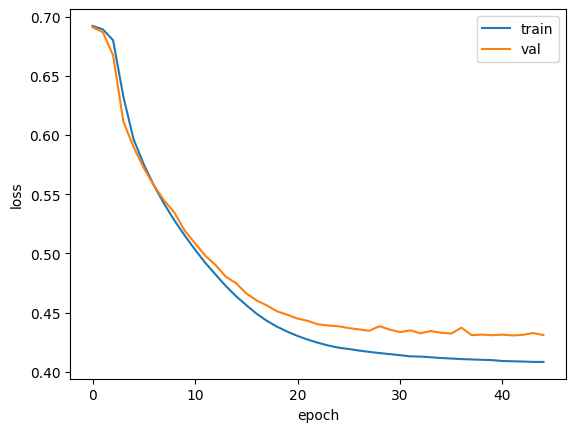

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6929 - accuracy: 0.5192 - val_loss: 0.6925 - val_accuracy: 0.5638
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6919 - accuracy: 0.5612 - val_loss: 0.6914 - val_accuracy: 0.5958
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6903 - accuracy: 0.5983 - val_loss: 0.6889 - val_accuracy: 0.6290
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6857 - accuracy: 0.6334 - val_loss: 0.6805 - val_accuracy: 0.6668
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6569 - accuracy: 0.6775 - val_loss: 0.6266 - val_accuracy: 0.6932
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6137 - accuracy: 0.6921 - val_loss: 0.5988 - val_accuracy: 0.7064
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5868 - accuracy: 0.7181 - val_loss: 0.5739 - val_accuracy: 0.

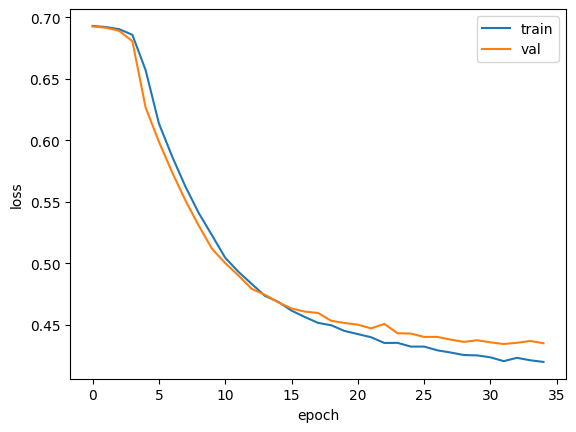

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 28ms/step - loss: 0.6931 - accuracy: 0.5087 - val_loss: 0.6929 - val_accuracy: 0.5216
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6926 - accuracy: 0.5502 - val_loss: 0.6923 - val_accuracy: 0.5232
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6909 - accuracy: 0.5847 - val_loss: 0.6883 - val_accuracy: 0.6500
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6714 - accuracy: 0.6580 - val_loss: 0.6346 - val_accuracy: 0.6842
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6072 - accuracy: 0.6916 - val_loss: 0.5805 - val_accuracy: 0.7124
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5670 - accuracy: 0.7242 - val_loss: 0.5489 - val_accuracy: 0.7358
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5386 - accuracy: 0.7446 - val_loss: 0.5208 - val_accuracy

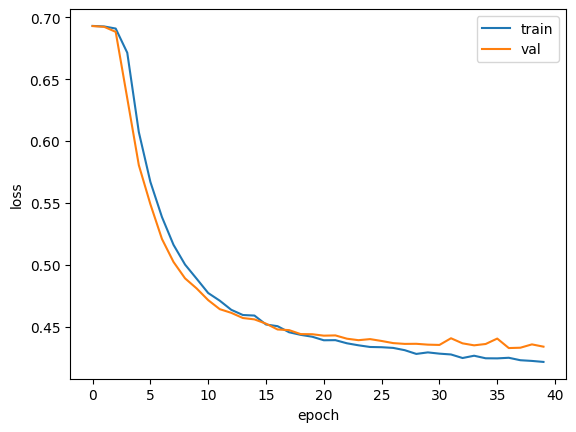

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6927 - accuracy: 0.5110 - val_loss: 0.6921 - val_accuracy: 0.5266
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6911 - accuracy: 0.5526 - val_loss: 0.6903 - val_accuracy: 0.5616
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6888 - accuracy: 0.5875 - val_loss: 0.6875 - val_accuracy: 0.5934
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6848 - accuracy: 0.6084 - val_loss: 0.6827 - val_accuracy: 0.5976
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6782 - accuracy: 0.6206 - val_loss: 0.6746 - val_accuracy: 0.6118
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6671 - accuracy: 0.6313 - val_loss: 0.6610 - val_accuracy: 0.6318
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6476 - accuracy: 0.6528 - val_loss: 0.6364 - val_accuracy: 0.6

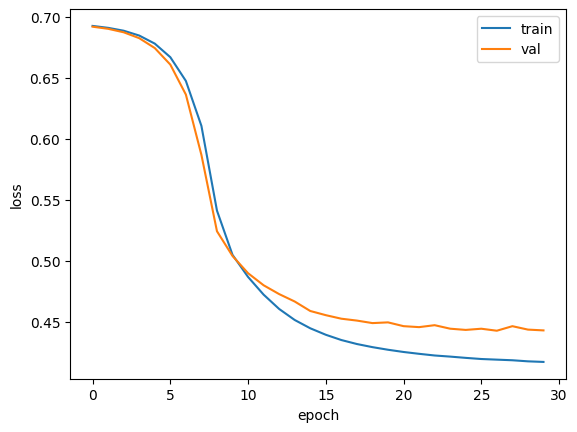

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()